# Projeto: Classifica√ß√£o de redes complexas - Redes Complexas (SME0130)
---

Aluno: Rafael Fernando Gigante

N¬∞ USP: 12610500

#Bibliotecas utilizadas#

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Implementa√ß√£o das medidas e resultados#

In [41]:
def momento_de_grau_m(G,m):
    momento = 0
    N = len(G)
    for i in G.nodes:
        momento += G.degree(i)**m
    momento = momento/N
    return momento

In [42]:
def calcular_medidas(G):
    medidas = []

    # N√∫mero de v√©rtices e arestas da rede
    N = len(G)
    M = G.number_of_edges()

    # Primeiro momento
    k1 = momento_de_grau_m(G,1)
    medidas.append(k1)

    # Segundo momento
    k2 = momento_de_grau_m(G,2)
    medidas.append(k2)

    # Vari√¢ncia
    variance = momento_de_grau_m(G,2) - momento_de_grau_m(G,1)**2
    medidas.append(variance)

    # Average clustering
    av_cl = nx.average_clustering(G)
    medidas.append(av_cl)

    # Average shortest path lenght
    l = nx.average_shortest_path_length(G)
    medidas.append(l)

    # Degree assortativity coefficient
    r=nx.degree_assortativity_coefficient(G)
    medidas.append(r)

    return medidas

In [43]:
cl = ['ER','WS','BA']

def gerar_redes(N, k1, n_nets):
    X = []
    y = []
    av_degree = k1

    # ER networks
    p = av_degree/(N-1)
    for i in range(0,n_nets):
        GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
        Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
        GER = GER.subgraph(Gcc[0])
        GER = nx.convert_node_labels_to_integers(GER, first_label=0)
        medidas = calcular_medidas(GER)
        X.append(medidas)
        y.append(0.0)

    # WS networks
    k = int(av_degree)
    p = 0.1 #probability of rewiring
    for i in range(0,n_nets):
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
        GWS = GWS.subgraph(Gcc[0])
        GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
        medidas = calcular_medidas(GWS)
        X.append(medidas)
        y.append(1.0)

    # BA networks
    m = int(av_degree/2)
    for i in range(0,n_nets):
        GBA = nx.barabasi_albert_graph(N, m)
        Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
        GBA = GBA.subgraph(Gcc[0])
        GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
        medidas = calcular_medidas(GBA)
        X.append(medidas)
        y.append(2.0)

    X = np.array(X)
    y = np.array(y)
    return X, y

In [44]:
def abrir_rede(caminho):
    G = nx.read_edgelist(caminho, nodetype=int, data=(('weight',float),))
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    N = len(G)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

    return G, N, M

In [45]:
def data_panda(x,y):
    data = pd.DataFrame(x)
    d_y = pd.DataFrame(y)
    return data

In [46]:
def data_pca(data):
    # Instanciar objeto PCA
    pca = PCA(n_components=2)

    # Aplicar PCA ao DataFrame
    data_PCA = pca.fit_transform(data)

    # Converter os resultados para um novo DataFrame
    data_PCA = pd.DataFrame(data_PCA)

    # Exibir o DataFrame transformado
    return data_PCA

In [47]:
def grafico_pca(data_PCA,y):
    # Separar os dados em colunas
    eixo_x = data_PCA[0]
    eixo_y = data_PCA[1]
    colors = y

    plt.title("PCA", fontsize = 22)
    # Definir r√≥tulos dos eixos
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    colors = y

    # Mapear os valores num√©ricos para cores
    color_map = {0.0: 'blue', 1.0: 'green', 2.0: 'orange'}
    color_labels = [color_map[val] for val in colors]

    # Criar o gr√°fico de dispers√£o
    plt.scatter(eixo_x, eixo_y, c=color_labels)

    # Criar a legenda das cores
    unique_values = np.unique(colors)
    label=['ER', 'WS', 'BA']
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[val], label=label[int(val)]) for val in unique_values]
    plt.legend(handles=legend_elements)

    # Exibir o gr√°fico
    plt.show()

# Classifica√ß√£o das redes #

## Network Science ##

This is a network of co-authorships in the area of network science.

Number of nodes: 379
Number of edges: 914


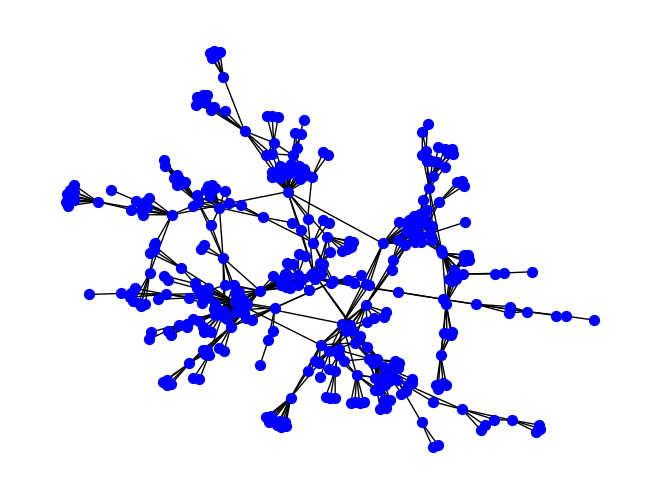

In [48]:
G, N, M = abrir_rede("/out.netscience")

In [49]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[4.823218997361478, 38.68601583113456, 15.422574334625903, 0.7412306142925664, 6.041867347935949, -0.08167784834672825]


In [50]:
X, y = gerar_redes(N, X_net[0],30)

In [51]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [52]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[1.]
Classe: WS


<ipython-input-52-5b4245e72690>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


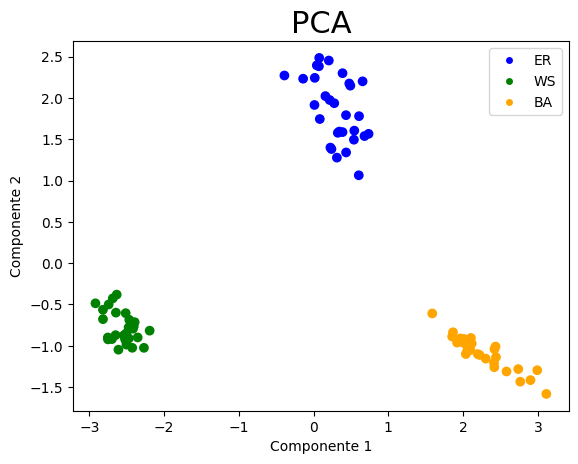

In [53]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [54]:
data = []
data.append(['Network Science'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-54-a007e7d55ed2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network    N    M       <k>       <k¬≤>        var         c  \
0  Network Science  379  914  4.823219  38.686016  15.422574  0.741231   

          l         r classe  
0  6.041867 -0.081678     WS

## Jazz musicians ##

This is the collaboration network between Jazz musicians. Each node is a Jazz musician and an edge denotes that two musicians have played together in a band. The data was collected in 2003.

Number of nodes: 198
Number of edges: 2742


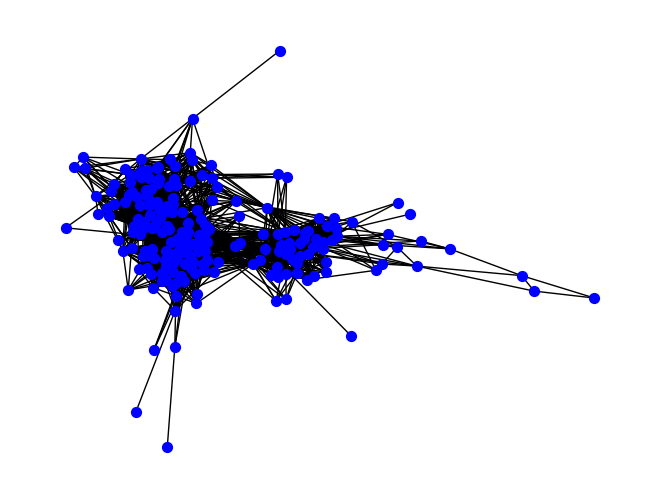

In [111]:
G, N, M = abrir_rede("/out.jazz")

In [112]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[27.696969696969695, 1070.2424242424242, 303.1202938475667, 0.6174507021536301, 2.2350407629595446, 0.020237399275047713]


In [113]:
X, y = gerar_redes(N, X_net[0],30)

In [114]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [115]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[0.]
Classe: ER


<ipython-input-115-5b4245e72690>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


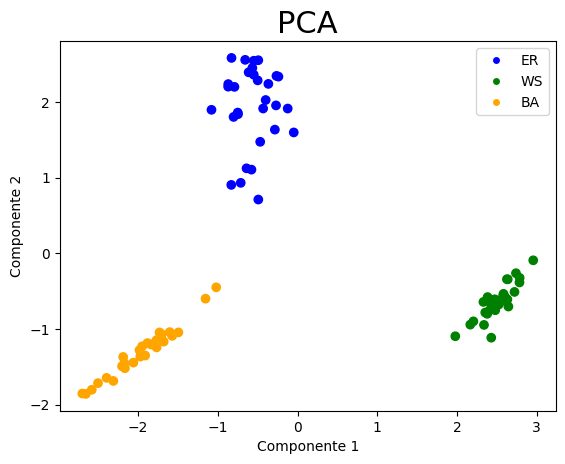

In [116]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [61]:
data = []
data.append(['Jazz musicians'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-61-ac0bcdd564b2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network    N     M       <k>         <k¬≤>         var         c  \
0  Jazz musicians  198  2742  27.69697  1070.242424  303.120294  0.617451   

          l         r classe  
0  2.235041  0.020237     ER

## Physicians ##

This directed network captures innovation spread among 246 physicians in for towns in Illinois, Peoria, Bloomington, Quincy and Galesburg. The data was collected in 1966. A node represents a physician and an edge between two physicians shows that the left physician told that the righ physician is his friend or that he turns to the right physician if he needs advice or is interested in a discussion. There always only exists one edge between two nodes even if more than one of the listed conditions are true.

Number of nodes: 453
Number of edges: 2025


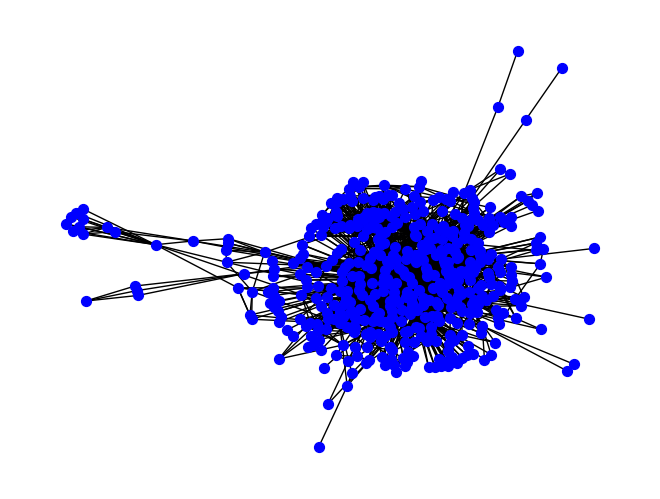

In [164]:
G, N, M = abrir_rede("/out.physicians")

In [165]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[8.940397350993377, 358.49006622516555, 278.55936143151615, 0.6464630921565053, 2.6637851882240327, -0.22582088796832953]


In [166]:
X, y = gerar_redes(N, X_net[0],30)

In [167]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [168]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[2.]
Classe: BA


<ipython-input-168-5b4245e72690>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


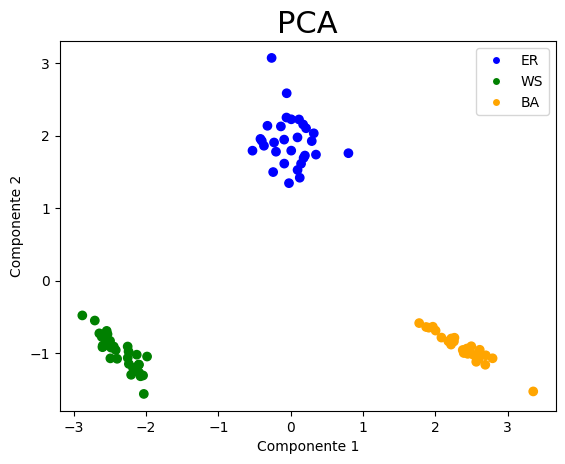

In [169]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [170]:
data = []
data.append(['Physicians'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-170-78d3ef641be7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network    N     M       <k>        <k¬≤>         var         c  \
0  Physicians  453  2025  8.940397  358.490066  278.559361  0.646463   

          l         r classe  
0  2.663785 -0.225821     BA

## Caenorhabditis elegans ##
This is the metabolic network of the roundworm Caenorhabditis elegans. Nodes are metabolites (e.g., proteins), and edges are interactions between them. Since a metabolite can iteract with itself, the network contains loops. The interactions are undirected. There may be multiple interactions between any two metabolites.

Number of nodes: 117
Number of edges: 465


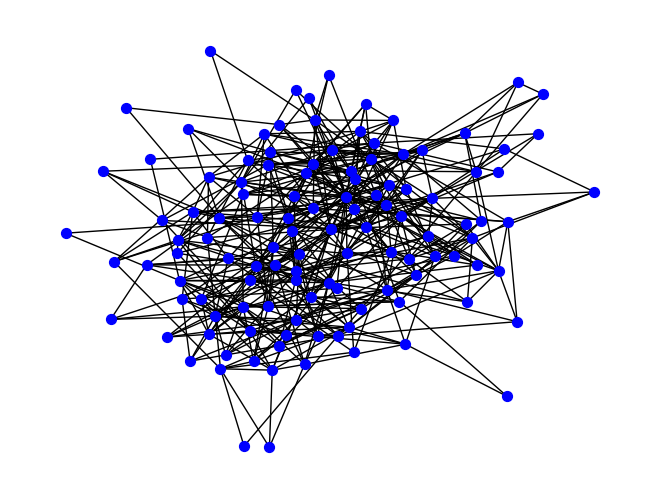

In [159]:
G, N, M = abrir_rede("/out.elegans")

In [160]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[7.948717948717949, 79.16239316239316, 15.980276134122278, 0.21923205948846972, 2.5870910698496905, -0.08415842551291443]


In [161]:
X, y = gerar_redes(N, X_net[0],30)

In [162]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [163]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[0.]
Classe: ER


<ipython-input-163-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


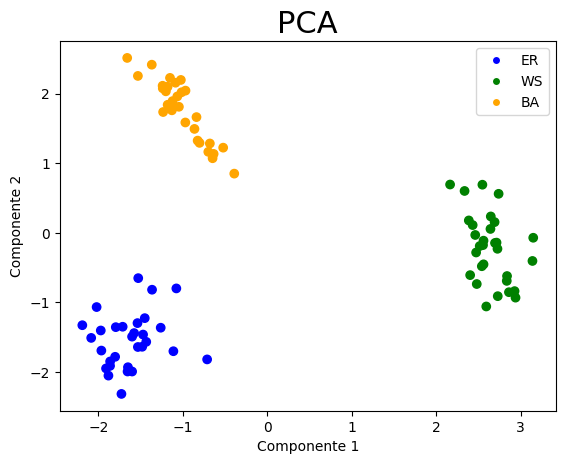

In [148]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [75]:
data = []
data.append(['Caenorhabditis elegans'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-75-bf95173abd6d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network    N    M       <k>       <k¬≤>        var         c  \
0  Caenorhabditis elegans  117  465  7.948718  79.162393  15.980276  0.219232   

          l         r classe  
0  2.587091 -0.084158     ER

## PDZBase ##
This is a network of protein‚Äìprotein interactions from PDZBase.

Number of nodes: 161
Number of edges: 209


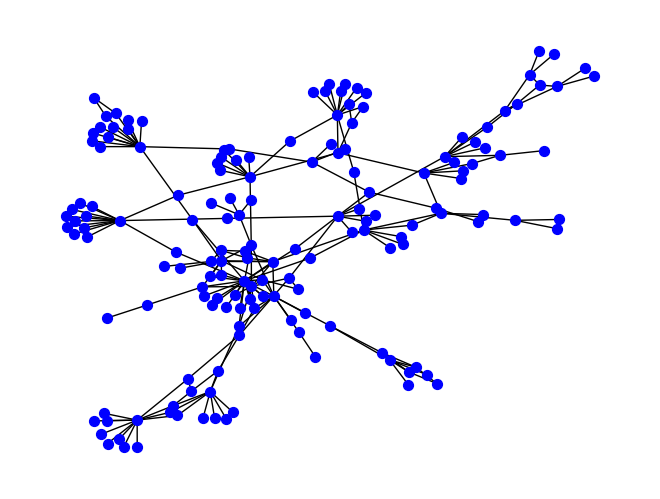

In [76]:
G, N, M = abrir_rede("/out.pdzbase")

In [77]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[2.5962732919254656, 15.254658385093167, 8.514023378727673, 0.007004830917874396, 5.326086956521739, -0.46585318485085137]


In [78]:
X, y = gerar_redes(N, X_net[0],30)

In [79]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [80]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[2.]
Classe: BA


<ipython-input-80-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


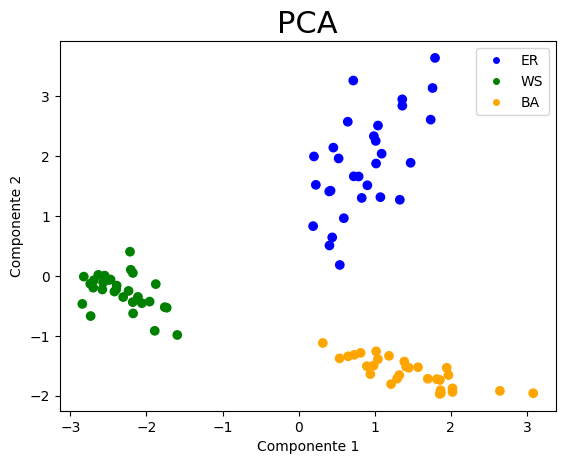

In [81]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [82]:
data = []
data.append(['PDZBase'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-82-4ceff8258264>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network    N    M       <k>       <k¬≤>       var         c         l  \
0  PDZBase  161  209  2.596273  15.254658  8.514023  0.007005  5.326087   

          r classe  
0 -0.465853     BA

## Human proteins (Stelzl) ##
This network represens interacting pairs of protein in Humans (Homo sapiens).

Number of nodes: 1615
Number of edges: 3106


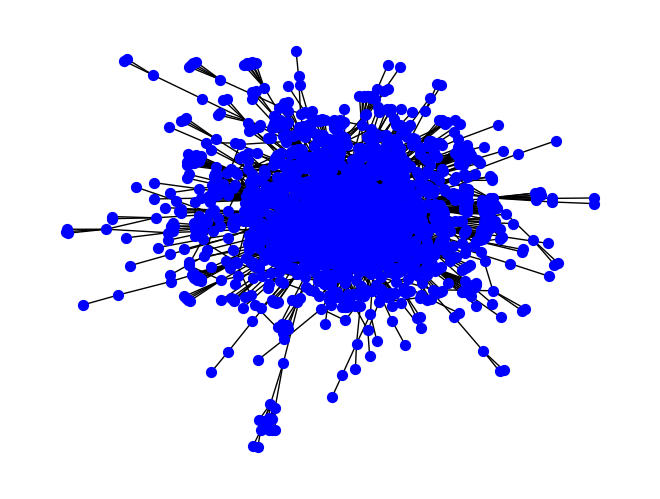

In [83]:
G, N, M = abrir_rede("/out.Stelzl")

In [84]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[3.846439628482972, 65.64829721362229, 50.85319939805806, 0.006273664470975432, 4.84803173470523, -0.20204015265266073]


In [85]:
X, y = gerar_redes(N, X_net[0],30)

In [86]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [87]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[2.]
Classe: BA


<ipython-input-87-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


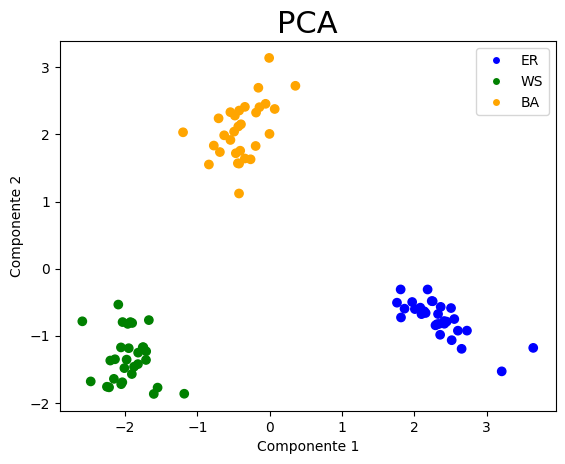

In [88]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [89]:
data = []
data.append(['Human proteins '] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-89-aa5fbeb8d550>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network     N     M      <k>       <k¬≤>        var         c  \
0  Human proteins   1615  3106  3.84644  65.648297  50.853199  0.006274   

          l        r classe  
0  4.848032 -0.20204     BA

## Power grid ##

This undirected network contains information about the power grid of the Western States of the United States of America. An edge represents a power supply line. A node is either a generator, a transformator or a substation.

Number of nodes: 4941
Number of edges: 6594


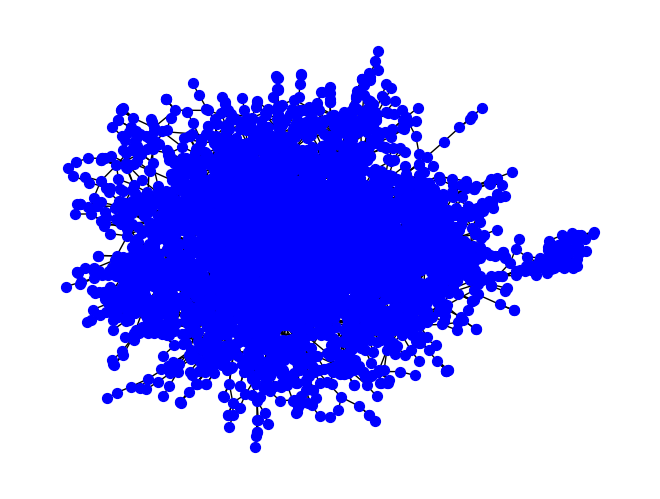

In [90]:
G, N, M = abrir_rede("/out.powergrid.opsahl-powergrid")

In [91]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[2.66909532483303, 10.332726168791742, 3.2086563157462056, 0.08010361108159712, 18.989185424445708, 0.0034569877442048825]


In [92]:
X, y = gerar_redes(N, X_net[0],30)

In [93]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [94]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[0.]
Classe: ER


<ipython-input-94-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


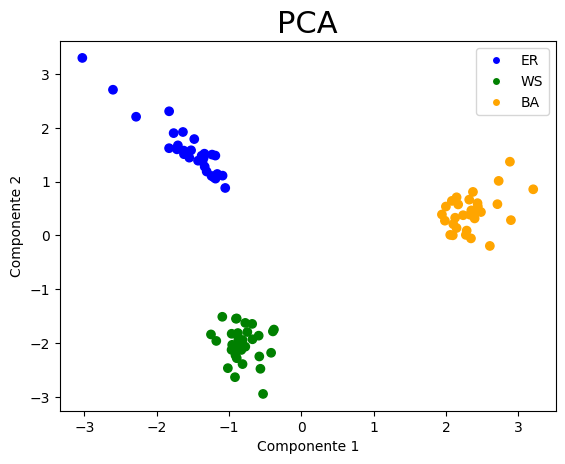

In [95]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [96]:
data = []
data.append(['Power grid'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-96-c5029d006ff7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network     N     M       <k>       <k¬≤>       var         c          l  \
0  Power grid  4941  6594  2.669095  10.332726  3.208656  0.080104  18.989185   

          r classe  
0  0.003457     ER

## US airports ##
This is the directed network of flights between US airports in 2010. Each edge represents a connection from one airport to another, and the weight of an edge shows the number of flights on that connection in the given direction, in 2010.

Number of nodes: 1572
Number of edges: 17214


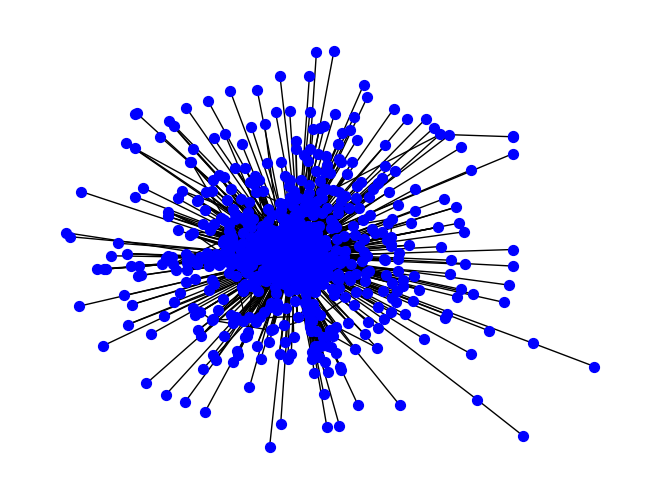

In [97]:
G, N, M = abrir_rede("/out.usairport")

In [98]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[21.900763358778626, 2457.8944020356234, 1978.250966338403, 0.5047939546538639, 3.1151638395019137, -0.11340155515827577]


In [99]:
X, y = gerar_redes(N, X_net[0],30)

In [100]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [101]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[2.]
Classe: BA


<ipython-input-101-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


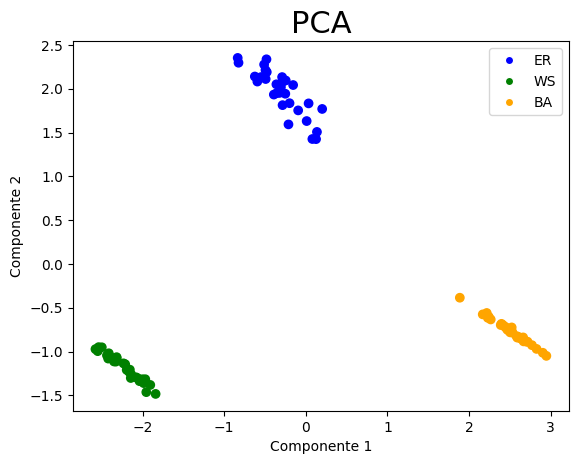

In [102]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [103]:
data = []
data.append(['US airports'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-103-ceddb974ce51>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network     N      M        <k>         <k¬≤>          var         c  \
0  US airports  1572  17214  21.900763  2457.894402  1978.250966  0.504794   

          l         r classe  
0  3.115164 -0.113402     BA

## Euroroads ##
This is the international E-road network, a road network located mostly in Europe. The network is undirected; nodes represent cities and an edge between two nodes denotes that they are connected by an E-road.

Number of nodes: 1039
Number of edges: 1305


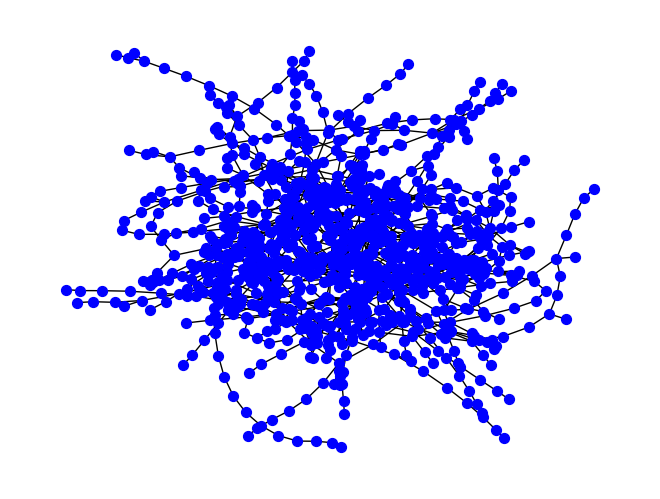

In [104]:
G, N, M = abrir_rede("/out.euroroads.subelj_euroroad_euroroad")

In [105]:
medidas = calcular_medidas(G)
X_net = medidas
print(X_net)

[2.512030798845043, 7.753609239653513, 1.4433105053074469, 0.018905541042210917, 18.39514614059391, 0.09003981380055513]


In [106]:
X, y = gerar_redes(N, X_net[0],30)

In [107]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net))
X_net = scaler.transform(X_net)

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)
# faz a predi√ß√£o no conjunto de teste

KNeighborsClassifier(metric='euclidean')

In [108]:
y_pred = model.predict(X_net)
print(y_pred)
print('Classe:', cl[int(y_pred)])

[0.]
Classe: ER


<ipython-input-108-ebbbd04cb64d>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Classe:', cl[int(y_pred)])


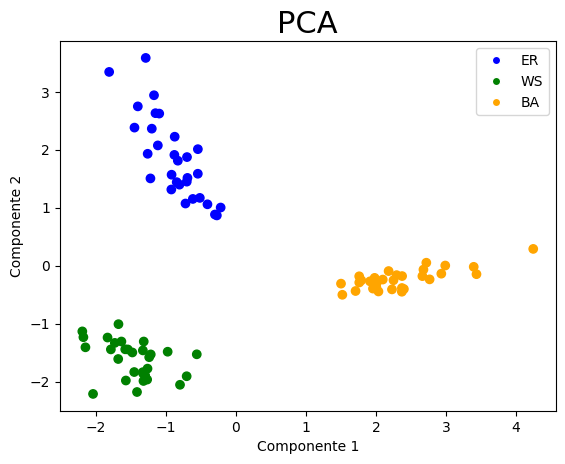

In [109]:
data = data_panda(X,y)
data_PCA = data_pca(data)
grafico_pca(data_PCA,y)

In [110]:
data = []
data.append(['Euroroads'] + [N, M]  + medidas)
data[0].append(cl[int(y_pred)])
df = pd.DataFrame(data, columns=['Network', 'N', 'M', '<k>', '<k¬≤>', 'var', 'c', 'l', 'r', 'classe'])
df.head()

<ipython-input-110-5b17ebfb2c66>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  data[0].append(cl[int(y_pred)])


Network     N     M       <k>      <k¬≤>       var         c          l  \
0  Euroroads  1039  1305  2.512031  7.753609  1.443311  0.018906  18.395146   

         r classe  
0  0.09004     ER

# Conclus√µes #

## Resultados obtidos ##

Tabela contendo os resultados obtidos para as redes utilizadas:

|         Network        |   N  |   M   | \<k> | <k¬≤> |     var     |     c    |     l     |     r     | Class |
|:----------------------:|:----:|:-----:|:------------:|:------------------:|:-----------:|:--------:|:---------:|:---------:|:-----:|
|        Network Science |  379 |   914 |     4.823219 |          38.686016 |   15.422574 | 0.741231 |  6.041867 | -0.081678 |    WS |
|         Jazz musicians |  198 |  2742 |     27.69697 |        1070.242424 |  303.120294 | 0.617451 |  2.235041 |  0.020237 |    ER |
|             Physicians |  117 |   465 |     7.948718 |          79.162393 |   15.980276 | 0.219232 |  2.587091 | -0.084158 |    BA |
| Caenorhabditis elegans |  453 |  2025 |     8.940397 |         358.490066 |  278.559361 | 0.646463 |  2.663785 | -0.225821 |    ER |
|                PDZBase |  161 |   209 |     2.596273 |          15.254658 |    8.514023 | 0.007005 |  5.326087 | -0.465853 |    BA |
|         Human proteins | 1615 |  3106 |      3.84644 |          65.648297 |   50.853199 | 0.006274 |  4.848032 |  -0.20204 |    BA |
|             Power grid | 4941 |  6594 |     2.669095 |          10.332726 |    3.208656 | 0.080104 | 18.989185 |  0.003457 |    ER |
|            US airports | 1572 | 17214 |    21.900763 |        2457.894402 | 1978.250966 | 0.504794 |  3.115164 | -0.113402 |    BA |
|              Euroroads | 1039 |  1305 |     2.512031 |           7.753609 |    1.443311 | 0.018906 | 18.395146 |   0.09004 |    ER |

A escolha do modelo mais adequado para descrever uma rede biol√≥gica, tecnol√≥gica ou social depende das caracter√≠sticas espec√≠ficas de cada tipo de rede. A seguir, feita uma breve descri√ß√£o de cada um dos modelos:

1. Modelo de √ârdos-Renyi (ER)
  -  Neste modelo, cada par de n√≥s tem uma probabilidade fixa ùëù de estarem conectados. O resultado √© uma rede aleat√≥ria.

2. Modelo de Albert-Barabasi (AB)
  -  Este modelo gera redes com uma distribui√ß√£o de grau de pot√™ncia , onde poucos n√≥s t√™m muitas conex√µes e muitos n√≥s t√™m poucas conex√µes, formando redes sem escala.

3. Modelo de Watts-Strogatz (WS)
  - Este modelo gera redes com caracter√≠sticas de "pequeno mundo", caracterizadas por alta efici√™ncia na transmiss√£o de informa√ß√£o (curta dist√¢ncia m√©dia entre os n√≥s) e alta clustering (tend√™ncia de formar tri√¢ngulos).

Para redes sociais, geralmente s√£o exibidas propriedades de "pequeno mundo" e a presen√ßa de hubs. Desse modo, os modelos de Albert-Barabasi e de Watts-Strogatz seriam os mais adequados para descrev√™-las. No projeto foi utilizada uma rede de co-autoria e outras duas de intera√ß√£o humana no mundo real. Cada uma das redes foi classificada como um dos modelos.

Para redes biol√≥gicas, o modelo de Albert-Barabasi √© o mais adequado, principalmente quando se trata de genes ou prote√≠nas. Essas redes possu√≠em como caracter√≠stica dominante sua distribui√ß√£o de grau sem escala e a presen√ßa de hubs. No projeto, duas das redes utilizadas foram classificadas como Albert=Barabasi e a outra foi classificada como √ârdos-Renyi.

Para as redes tecnol√≥gicas foram utilizadas tr√™s redes de infraesturura, ou seja, elas possuem limita√ß√µes f√≠sicas nas suas conex√µes. Para a rede de aeroportos √© esperado uma distribui√ß√£o de grau em lei de pot√™ncia, com poucos aeroportos principais conectados a muitos aeroportos menores. O modelo mais adequado para classificar essa rede √© o de Albert-Barabasi, concordando com a classifica√ß√£o obtida no projeto. As outras duas redes, power grid e euroroads, foram classificadas como √ârdos-Renyi.

Desse modo, conclu√≠mos que n√£o necessariamente todas as redes de uma mesma categoria ser√£o classificadas como sendo do mesmo modelo. √â importante considerar as peculiaridades de cada rede individualmente, assim podemos verificar qual modelo √© o mais adequado para descrev√™-la.


## Medidas comuns para cada um dos modelos ##

1. Modelo de √ârdos-Renyi (ER)
  - Distribui√ß√£o de grau: segue uma distribui√ß√£o de Poisson.
  - Comprimento m√©dio do caminho: tendem a ter um comprimento m√©dio do caminho que cresce logaritmicamente com o n√∫mero de n√≥s.
  - Coeficiente de clustering: o coeficiente de clustering √© baixo e aproximadamente igual √† probabilidade de uma liga√ß√£o entre quaisquer dois n√≥s, p.
  - Distribui√ß√£o de componentes conexas: a distribui√ß√£o dos tamanhos dos componentes conexas pode ser usada para identificar o ponto de transi√ß√£o de percola√ß√£o, onde uma componente gigante surge.

2. Modelo de Albert-Barabasi (AB)
  - Distribui√ß√£o de grau: segue uma distribui√ß√£o de grau em lei de pot√™ncia.
  - Comprimento m√©dio do caminho: similar ao modelo ER, mas redes AB frequentemente t√™m um comprimento m√©dio do caminho menor devido √† presen√ßa de hubs.
  - Coeficiente de clustering: pode variar, mas redes AB geralmente exibem um coeficiente de clustering maior do que redes ER.
  - Assortatividade: redes AB geralmente s√£o desassortativas.

3. Modelo de Watts-Strogatz (WS)
  - Distribui√ß√£o de grau: inicialmente, √© semelhante √† de uma rede regular, mas ap√≥s a reconfigura√ß√£o de liga√ß√µes, a distribui√ß√£o de grau pode variar dependendo do n√∫mero de liga√ß√µes reconfiguradas.
  - Comprimento m√©dio do caminho: redes WS t√™m um comprimento m√©dio do caminho pequeno, similar √†s redes ER, mas com um coeficiente de clustering significativamente maior.
  - Coeficiente de clustering: muito mais alto do que em redes ER.